In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4058,spam,Moby Pub Quiz.Win a å£100 High Street prize if...,NaN,NaN,NaN
653,ham,Fine i miss you very much.,NaN,NaN,NaN
3303,ham,IM GONNAMISSU SO MUCH!!I WOULD SAY IL SEND U A...,NaN,NaN,NaN
1920,ham,Dont know you bring some food,NaN,NaN,NaN
4164,spam,"Dear Voucher Holder, To claim this weeks offer...",NaN,NaN,NaN


In [4]:
df.shape


(5572, 5)

In [5]:
# 1.Data Cleaning
# 2.EDA
# 3.Text Pre-Processing
# 4.Model Bilding
# 5.Evaluation
# 6.Imporvements Depending upon the Evaluation
# 7.Webstie
# 8.Deployment

## 1.Data Cleaning


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# dop last 3 col as most values are null
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)

,v1,v2
282,ham,Ok. I asked for money how far
1783,ham,No dear i do have free messages without any re...
995,ham,Change again... It's e one next to escalator...
1085,ham,FR'NDSHIP is like a needle of a clock. Though ...
1544,ham,After completed degree. There is no use in joi...


In [9]:
#Renaming the columns
df.rename(columns={"v1":"target", "v2":"text"}, inplace=True)
df.sample(5)

,target,text
70,ham,Wah lucky man... Then can save money... Hee...
839,spam,Last chance 2 claim ur å£150 worth of discount...
58,ham,Tell where you reached
4147,spam,Please call Amanda with regard to renewing or ...
1164,ham,Well. Im computerless. Time to make some oreo ...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicate values
df.duplicated().sum()


np.int64(403)

In [15]:
#remove duplicates
df = df.drop_duplicates(keep="first")


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(5169, 2)

## 2.EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

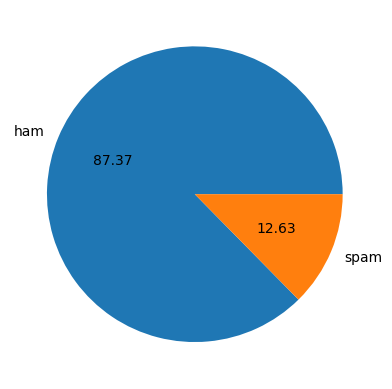

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [21]:
#data is imbalanced

In [22]:
!pip install nltk

In [23]:
import nltk

In [24]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Varda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Varda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len)


In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

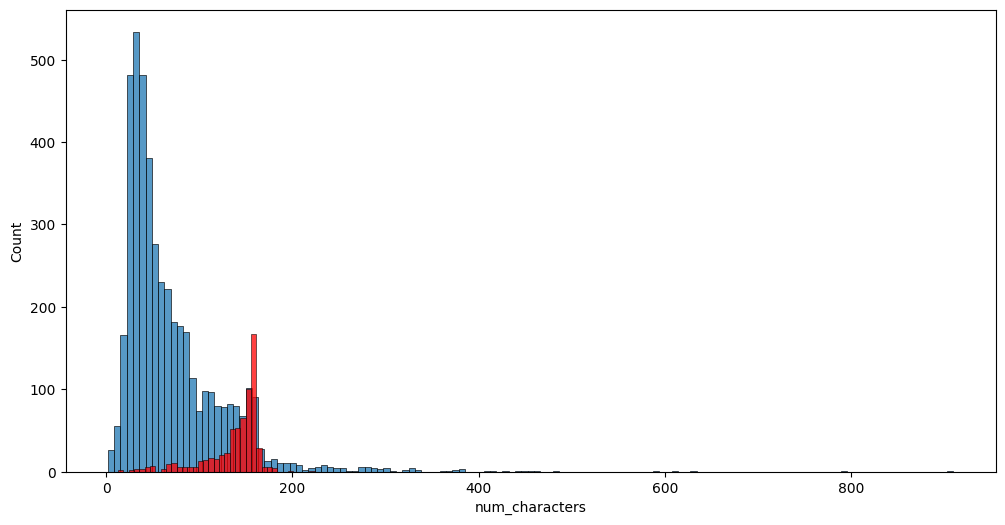

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

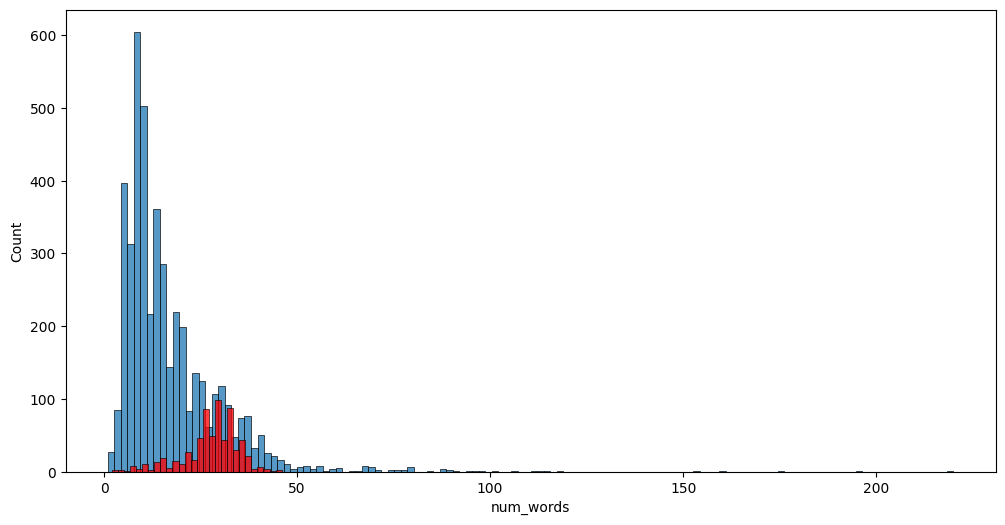

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

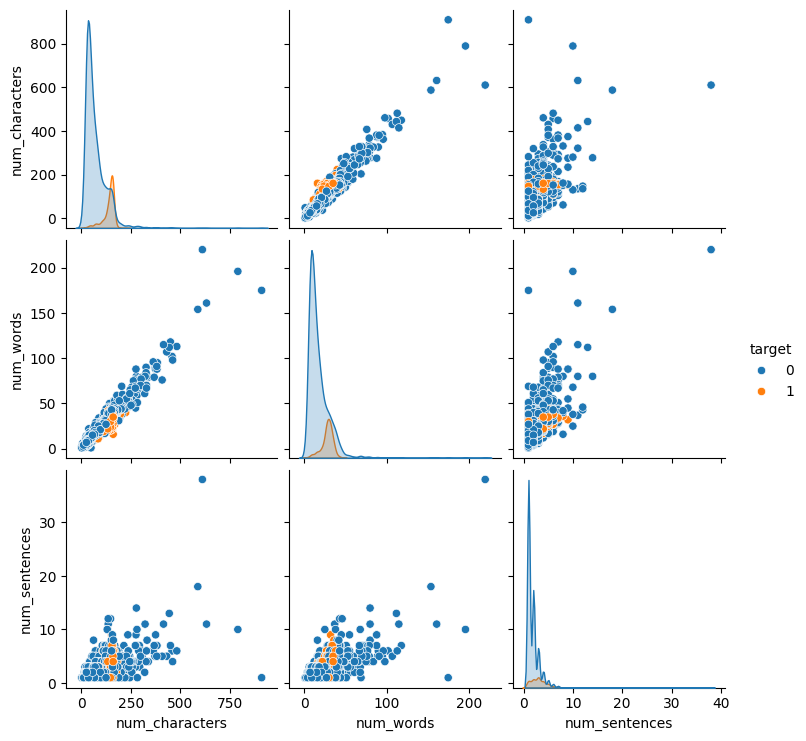

In [37]:
sns.pairplot(df,hue='target')

<Axes: >

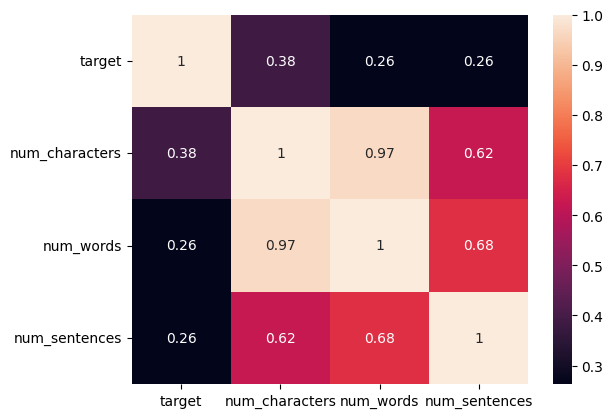

In [38]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## 3.Data Processing
    Lower Case
    Tokenization
    Removing special characters
    Removing stop words and punctuation
    Stemming

In [39]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

# Download required NLTK data
nltk.download('stopwords')

# Initialize the stemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)

    # Use a list comprehension for a cleaner and more efficient implementation
    tokens = [ps.stem(word) for word in tokens if word.isalnum() and word not in stopwords.words('english') and word not in string.punctuation]

    return " ".join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Varda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [41]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

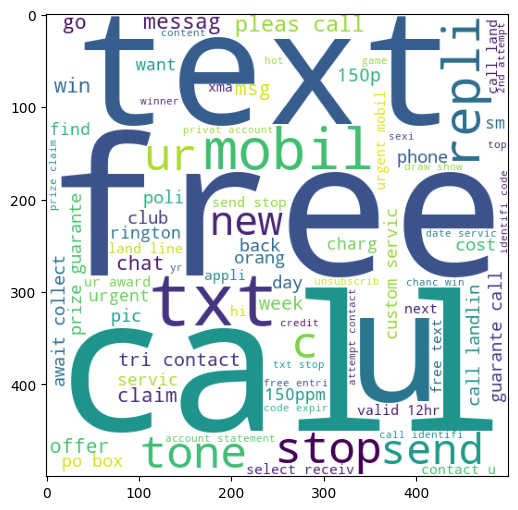

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


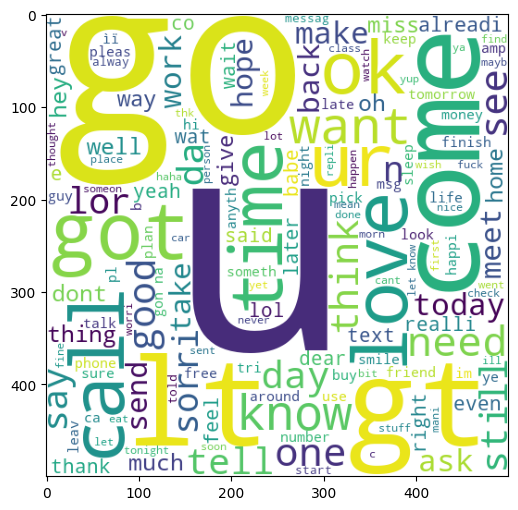

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [52]:
len(spam_corpus)

9939

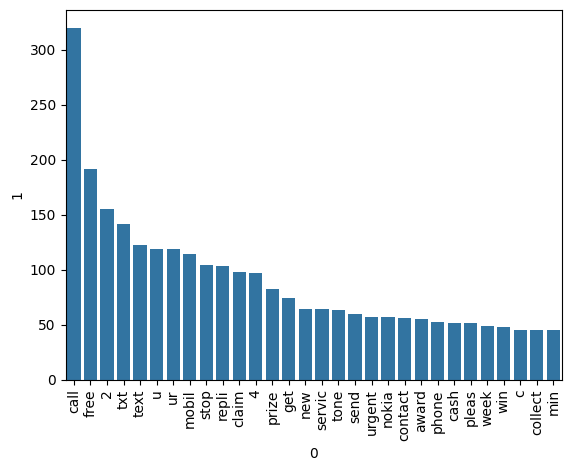

In [53]:
from collections import Counter
# Create a DataFrame of the 30 most common words and their counts
common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30))
# Use keyword arguments x and y for the barplot
sns.barplot(x=common_words_df[0], y=common_words_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

35404

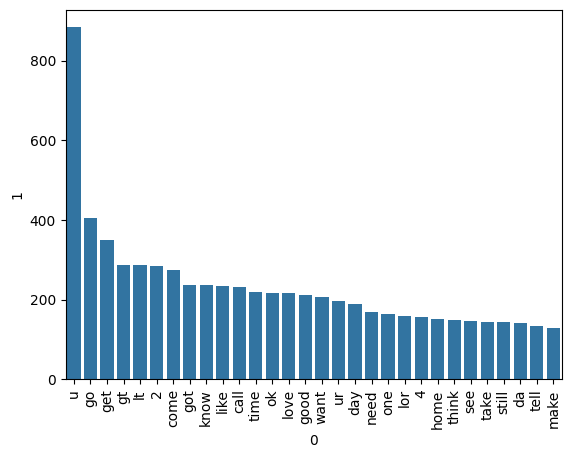

In [56]:
from collections import Counter
# Create a DataFrame of the 30 most common words and their counts
common_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30))
# Use keyword arguments x and y for the barplot
sns.barplot(x=common_words_df[0], y=common_words_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4.Model Building

In [58]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [59]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [60]:
X.shape

(5169, 3000)

In [61]:
y = df['target'].values

In [62]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [68]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [100]:
# Save fitted tfidf and MultinomialNB to disk (ensure model is fitted before saving)
import pickle
from sklearn.utils.validation import check_is_fitted

try:
    check_is_fitted(mnb)
except Exception:
    # If mnb isn't fitted in the current kernel, fit it now using the training set
    print("mnb not fitted in memory — fitting now before saving...")
    mnb.fit(X_train, y_train)

# Save artifacts
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))
print("Saved 'vectorizer.pkl' and 'model.pkl' (mnb).")


mnb not fitted in memory — fitting now before saving...
Saved 'vectorizer.pkl' and 'model.pkl' (mnb).


In [69]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [70]:
# tfidf --> MNB

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2, estimator=DecisionTreeClassifier(max_depth=1), algorithm='SAMME')
# bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [73]:
clfs = {
    'SVC' : svc,
    # 'KN' : knc,  # Removed due to poor performance on sparse data
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    # 'AdaBoost': abc,
    # 'BgC': bc,
    'ETC': etc,
    # 'GBDT':gbdt, # Removed as it does not support sparse matrices
    'xgb':xgb
}

In [74]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [75]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, np.float64(0.9747899159663865))

In [76]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.83
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  DT
Accuracy -  0.9303675048355899
Precision -  0.83
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  xgb
Accuracy -  0.965183752417795
Precision -  0.9396551724137931
For  xgb
Accuracy -  0.965183752417795
Precision -  0.9396551724137931


In [77]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [78]:
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.970986,1.000000
4,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
5,ETC,0.974855,0.974576
3,LR,0.955513,0.960000
6,xgb,0.965184,0.939655
2,DT,0.930368,0.830000


In [79]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [80]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.970986
1,RF,Accuracy,0.973888
2,SVC,Accuracy,0.975822
3,ETC,Accuracy,0.974855
4,LR,Accuracy,0.955513
5,xgb,Accuracy,0.965184
6,DT,Accuracy,0.930368
7,NB,Precision,1.000000
8,RF,Precision,0.982609
9,SVC,Precision,0.974790


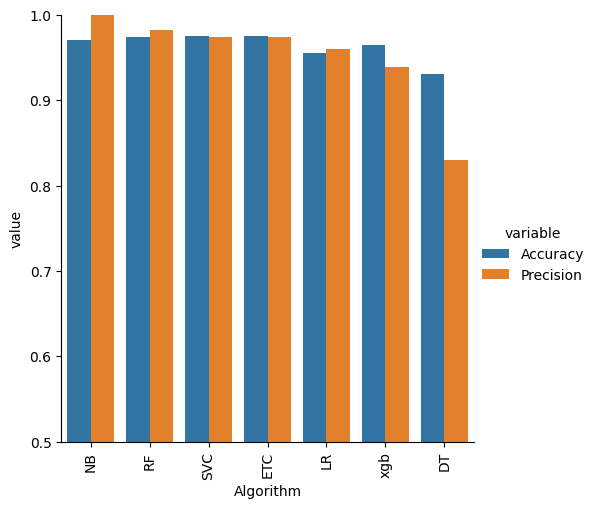

In [81]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [82]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [83]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [84]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [85]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [86]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [88]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
1,RF,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
2,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
3,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
4,LR,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000
5,xgb,0.965184,0.939655,0.965184,0.939655,0.965184,0.939655,0.965184,0.939655
6,DT,0.930368,0.830000,0.930368,0.830000,0.930368,0.830000,0.930368,0.830000


In [89]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [90]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [91]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [92]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [93]:
# Define a new SVC for stacking without probability=True to improve speed
svc_stacking = SVC(kernel='sigmoid', gamma=1.0, probability=False)
estimators=[('svm', svc_stacking), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [94]:
from sklearn.ensemble import StackingClassifier

In [95]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [96]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [97]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [101]:
# Robust prediction cell — safely predict a single SMS
# Edit `input_sms` to test other messages.
import pickle
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError

input_sms = "Congratulations! You won a prize. Reply YES to claim."

# 1) Preprocess
transformed_sms = transform_text(input_sms)

# 2) Ensure tfidf is fitted or load saved vectorizer
try:
    check_is_fitted(tfidf)
except Exception:
    try:
        tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
        print("Loaded 'vectorizer.pkl'.")
    except Exception:
        raise RuntimeError("TfidfVectorizer not fitted and 'vectorizer.pkl' not found. Run training cells or create the pickle.")

# 3) Ensure model is fitted or load saved model
try:
    check_is_fitted(mnb)
except Exception:
    try:
        mnb = pickle.load(open('model.pkl', 'rb'))
        print("Loaded 'model.pkl'.")
    except Exception:
        raise RuntimeError("Model not fitted and 'model.pkl' not found. Run training cells or create the pickle.")

# 4) Vectorize and predict
vector_input = tfidf.transform([transformed_sms]).toarray()
result = mnb.predict(vector_input)[0]
print("Spam" if result == 1 else "Ham")


Spam
